1. n independent identically distributed random variables which obey the Bernoulli distribution with Pr(Xi = 1) = p. Find the distribution of U = min and V = max

Answer:

The probability mass function (PMF) of a Bernoulli distribution is given by:
* Pr(Xi = 1) = p 
* Pr(Xi = 0) = 1-p

The value of U can only be 0 or 1, since the Xi are Bernoulli random variables. If any one of the Xi's is 1, then U = 1. Otherwise, if all of the Xi's are 0, then U = 0. Therefore, we have:
* Pr(U = 0) = Pr(X1=0, X2=0,..., Xn=0) = (1-p)^n
* Pr(U = 1) = 1 - Pr(U = 0) = 1 - (1-p)^n

So the distribution of U is a Bernoulli distribution with parameter 1 - (1-p)^n

Those things can also be applied to V. Therefore, the distribution of V is a Bernoulli distribution with parameter 1 - (1 - (1-p)^n)


2. how would you describe, using the Kendall-Lee notation, a system in which package arrive at regular times, e.g., one every 5 seconds, they are checked by 4 customer service representatives (CSR) that take a random time to verify their contents (this time may be assumed exponentially distributed with mean η > 0, and the CSR do not communicate). Every now and then, packages arrive with a red tag; red-tagged packages are immediately opened by any of the four CSR. The maximum line capacity is of one hundred packaged, and they arrive from the whole world

Answer: D/M/4/4+K/∞/PQ

* D: package arrives at regular times, e.g., one every 5 seconds
* M: checked by 4 CSR that take a random time to verify their contents
* 4: 4 CSR available to provide service
* 4 + K: the system has a finite capacity of K = 100 packages in line
* ∞: packages arrvive from the whole world
* PQ: the system also has a special rule for red-tagged packages, which are immediately opened by any of the four CSRs


3. Assume all CSR are busy. What's the expected time for the first red-tagged package in the line to be opened.

Answer:
* the service time (or the expected time for a package in the line to be opened), E[service-time] = 1/µ
* the mean service rate, µ
* the mean wait in the queue, W_q
* the mean wait in the system, W = W_q + 1/µ

Because all four CSRs are busy, a red-tagged package should have to wait in the priority queue until one of the CSRs becomes available. In this case, we only care about the expected time for the first red-tagged package in the line to be opened. 

To find it, we will use Little's Law and the result would be:

W_q_of_the_first = E[service_time] = 1/µ

Because all four CSRs would take a random time to verify any package content, this expected time would be exponentially distributed with mean η > 0. It means:

W_q_of_the_first = E[service_time] = η = 1/µ

4. 

Answer:

Step 1. To parametrize the Erlang distribution, Erlang(k, θ), in terms of its mean, we use:

$$
µ = \frac{k}{θ} <=> θ = \frac{k}{µ}
$$

Substituting this into the PDF, we have:

$$
f_{Z}(z) = \frac{(\frac{k}{µ})^k}{(k-1)!} z^{k-1} e^{-\frac{k}{µ}z}  1_{R_{+}}(z)
$$

Step 2. Implementation in Python

In [1]:
import math

# pdf = coefficient * power * exponetial
def erlang_pdf (z, k, mu):
    if z < 0:
        return 0
    
    theta = k/mu
    coefficient = (theta**k)/math.factorial(k-1)
    power = z**(k-1)
    exponential = math.exp(-theta * z)
    
    pdf = coefficient * power * exponential
    
    return pdf

Step 3. compute the variance using this parametrization

Answer: we have 

$$
Var(Z) = \frac{k}{µ^2}
$$

Step 4. plots of this reparametrized density with µ = 3 and varying values of the variance

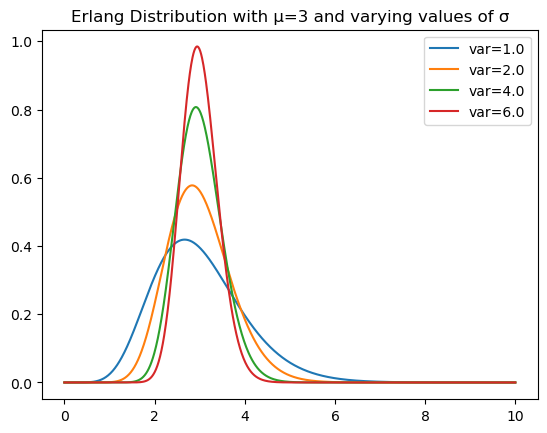

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# choose k = 9 to make the variance more noticeable
#k = 9
mu = 3
variances = [1, 2, 4, 6]

x = np.linspace(0, 10, 1000)
for var in variances:
    #y = [erlang_pdf(z, k, mu) for z in x]
    #plt.plot(
    #    x, 
    #    y, 
    #    label=f"var={var:.1f}"
    #)
    #sigma = math.sqrt(var * mu**2 / k)
    #plt.plot(x, [erlang_pdf(z, k, mu) for z in x], label=f"σ={sigma:.1f}")
    k = var * mu**2
    y = [erlang_pdf(z, k, mu) for z in x]
    plt.plot(
        x, 
        y, 
        label=f"var={var:.1f}"
    )
    
plt.title(f"Erlang Distribution with μ={mu} and varying values of σ")
    
plt.legend()
plt.show()


As the variance increases, the density becomes more spread out and flatter.